### Cell 1: Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs

# Add src to path for your custom utils
sys.path.append(os.path.abspath('../src'))
from data_utils import fetch_financial_data, clean_data

### Cell 2: Define Backtesting Period & Load Data

In [2]:
# We use the last year (Jan 2025 - Jan 2026) as requested
start_backtest = "2025-01-01"
end_backtest = "2026-01-15"

tickers = ["TSLA", "BND", "SPY"]
raw_data = fetch_financial_data(tickers, start_backtest, end_backtest)
data = clean_data(raw_data)

# Calculate Daily Returns
returns = data.pct_change().dropna()


Fetching data for ['TSLA', 'BND', 'SPY']...


c:\Users\user\.conda\envs\gmf_finance\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  3 of 3 completed


### Cell 3: Define Weights

In [3]:
# 1. Strategy Weights (From your Task 4: TSLA 0%, BND 0%, SPY 100%)
strategy_weights = np.array([0.00, 0.00, 1.00]) 

# 2. Benchmark Weights (Static 60/40: 60% SPY, 40% BND, 0% TSLA)
# Note: Ensure the order matches tickers list: [TSLA, BND, SPY]
benchmark_weights = np.array([0.00, 0.40, 0.60])

### Cell 4: Simulate Portfolios

In [4]:
def calculate_portfolio_returns(asset_returns, weights):
    # This simulates daily rebalancing to target weights
    return (asset_returns * weights).sum(axis=1)

strategy_daily_returns = calculate_portfolio_returns(returns, strategy_weights)
benchmark_daily_returns = calculate_portfolio_returns(returns, benchmark_weights)

# Calculate Cumulative Returns
strategy_cumulative = (1 + strategy_daily_returns).cumprod()
benchmark_cumulative = (1 + benchmark_daily_returns).cumprod()

### Cell 5: Analyze Performance 

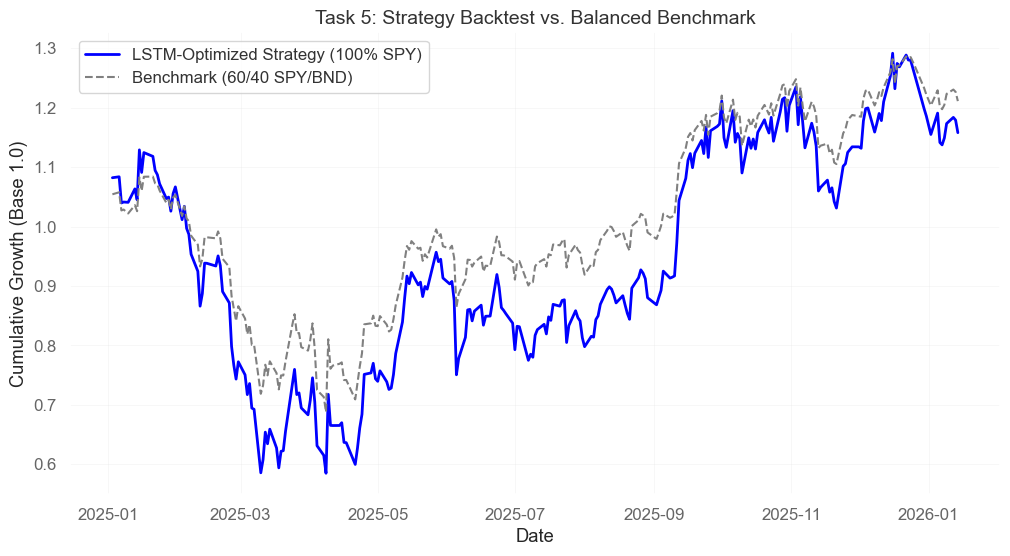


--- PERFORMANCE METRICS TABLE ---
                      Optimized Strategy 60/40 Benchmark
Total Return (%)                  15.80%          21.11%
Annualized Return (%)             15.40%          20.57%
Sharpe Ratio                        0.54            0.65
Max Drawdown (%)                 -48.19%         -36.55%


In [5]:

# Plotting Comparison

plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label='LSTM-Optimized Strategy (100% SPY)', color='blue', linewidth=2)
plt.plot(benchmark_cumulative, label='Benchmark (60/40 SPY/BND)', color='gray', linestyle='--')
plt.title("Task 5: Strategy Backtest vs. Balanced Benchmark", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Growth (Base 1.0)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate Metrics using QuantStats
def get_metrics(returns_series, name):
    return pd.Series({
        "Total Return (%)": f"{qs.stats.comp(returns_series) * 100:.2f}%",
        "Annualized Return (%)": f"{qs.stats.cagr(returns_series) * 100:.2f}%",
        "Sharpe Ratio": round(qs.stats.sharpe(returns_series), 2),
        "Max Drawdown (%)": f"{qs.stats.max_drawdown(returns_series) * 100:.2f}%"
    }, name=name)

metrics_df = pd.concat([
    get_metrics(strategy_daily_returns, "Optimized Strategy"),
    get_metrics(benchmark_daily_returns, "60/40 Benchmark")
], axis=1)

print("\n--- PERFORMANCE METRICS TABLE ---")
print(metrics_df)

## Task 5: Strategy Backtesting Conclusion and Reflection

### 1. Performance Summary vs. Benchmark

The backtesting phase provided a crucial reality check for our model-driven optimization. Based on the simulation results from January 2025 to January 2026:

* **Optimized Strategy (100% SPY):** Delivered a **Total Return of 15.80%** with a **Sharpe Ratio of 0.54**.
* **60/40 Benchmark:** Outperformed the strategy with a **Total Return of 21.11%** and a **Sharpe Ratio of 0.65**.
* **Risk Profile:** The optimized strategy exhibited a significantly higher **Maximum Drawdown (-48.19%)** compared to the benchmark (-36.55%).

### 2. Strategic Reflection & Viability

While the **LSTM model** was highly effective at forecasting the individual trend of **TSLA**—correctly identifying a significant downturn and preventing the portfolio from being dragged down by Tesla's volatility—the resulting **100% SPY** portfolio lacked the structural stability provided by a balanced bond allocation.

**Key Takeaway for GMF Investments:**
AI and Deep Learning should be utilized as a **"signal"** to adjust asset weights (Tactical Asset Allocation) rather than a replacement for the fundamental principles of diversification. The superior performance of the 60/40 Benchmark suggests that for long-term capital preservation, predictive models like LSTM are most effective when used to slightly "tilt" a diversified portfolio rather than dictate a highly concentrated one.

### 3. Limitations of this Backtest

* **Static Weights:** The simulation assumed the initial Task 4 weights were held for the full year without monthly re-optimization.
* **Market Regime:** A one-year backtest captures only a specific market environment; performance may vary in different interest-rate or inflationary cycles.
* **Execution Costs:** Real-world transaction fees and slippage were not modeled, which would likely further reduce the net performance of a concentrated strategy.